In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

merged = pd.read_csv(r"C:\Users\jurge\Desktop\School Related\PDS-Assignment-1\Assignment 2\After Cleansing\Merged.csv")
merged = merged[merged.year >= 2000]
merged

,year,sex,lasalle_degree,nafa_degree,nie,ntu,nus,sit,smu,suss,sutd,total,type
54,2000,F,0,0,2247,6223,11341,0,212,0,0,20023,enroll
55,2000,MF,0,0,3072,14583,21233,0,305,0,0,39193,enroll
56,2000,M,0,0,825,8360,9892,0,93,0,0,19170,enroll
57,2001,F,0,0,2292,6504,11781,0,579,0,0,21156,enroll
58,2001,MF,0,0,3095,15008,22172,0,803,0,0,41078,enroll
59,2001,M,0,0,803,8504,10391,0,224,0,0,19922,enroll
60,2002,MF,0,0,3368,15598,22169,0,1389,0,0,42524,enroll
61,2002,M,0,0,913,8776,10516,0,415,0,0,20620,enroll
62,2002,F,0,0,2455,6822,11653,0,974,0,0,21904,enroll
63,2003,F,0,0,2080,6830,11036,0,1469,0,0,21415,enroll


In [2]:
NUS = merged[["year", "sex","nus", "total", "type"]]
NUS

,year,sex,nus,total,type
54,2000,F,11341,20023,enroll
55,2000,MF,21233,39193,enroll
56,2000,M,9892,19170,enroll
57,2001,F,11781,21156,enroll
58,2001,MF,22172,41078,enroll
59,2001,M,10391,19922,enroll
60,2002,MF,22169,42524,enroll
61,2002,M,10516,20620,enroll
62,2002,F,11653,21904,enroll
63,2003,F,11036,21415,enroll


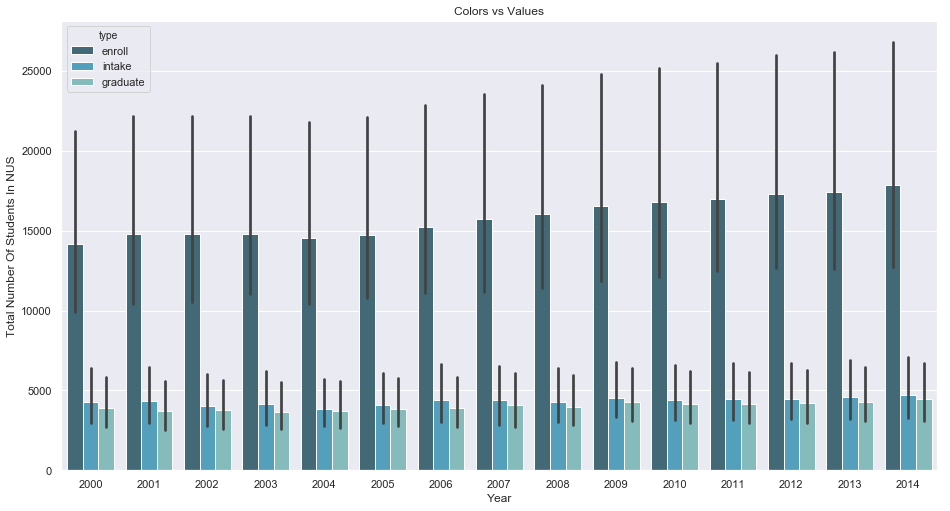

In [3]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.barplot(x="year", y="nus", hue= "type", data=NUS, palette="GnBu_d")

ax.set(xlabel='Year', ylabel='Total Number Of Students In NUS')
plt.title("Colors vs Values")


plt.show(ax)


In [4]:
intake_grad = NUS[NUS.type !="enroll"]
intake_grad = intake_grad[intake_grad.sex != "MF"].sort_values("year").reset_index(drop = True)
intake_grad

,year,sex,nus,total,type
0,2000,F,3437,7326,intake
1,2000,F,3161,6601,graduate
2,2000,M,2697,5553,graduate
3,2000,M,2984,6092,intake
4,2001,F,3534,7377,intake
5,2001,M,2524,5380,graduate
6,2001,F,3051,6671,graduate
7,2001,M,2945,5869,intake
8,2002,M,2767,5999,intake
9,2002,F,3252,7390,intake


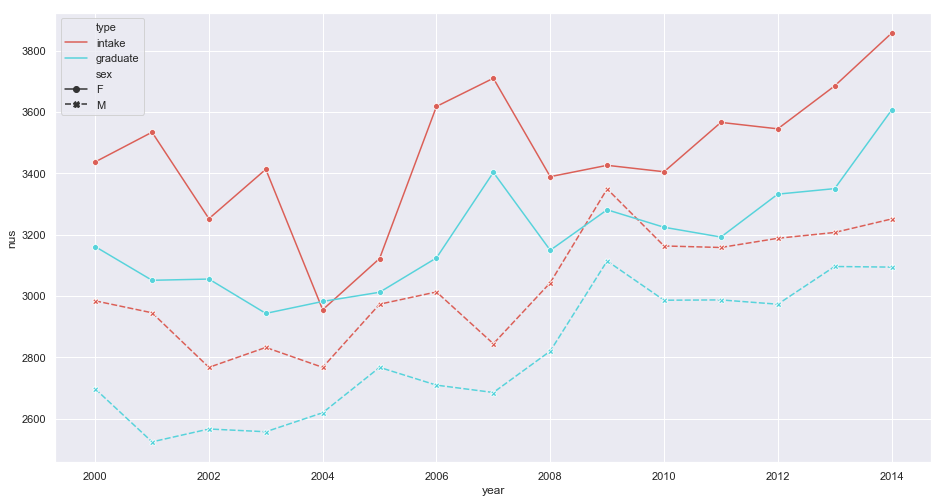

In [5]:
#Look at the past events in the 14 years
ax = sns.lineplot(x="year", y="nus", hue = "type", style="sex", markers = True, palette = "hls", data=intake_grad)


In [135]:
# employment = pd.read_csv(r"C:\Users\jurge\Desktop\School Related\PDS-Assignment-1\Assignment 2\Raw Data\graduate-employment-survey-ntu-nus-sit-smu-sutd.csv")
# employment = employment[employment.university == "National University of Singapore"]
# employment

In [130]:
firstgrad = pd.read_csv(r"C:\Users\jurge\Desktop\School Related\PDS-Assignment-1\Assignment 2\Raw Data\graduates-from-university-first-degree-courses-by-type-of-course.csv",
                       na_values = "na")
firstgrad = firstgrad[firstgrad.year >= 2000].reset_index(drop = True).set_index(["year", "type_of_course"])
# firstgrad = firstgrad[firstgrad.type_of_course.isin(["Engineering Sciences", 
#                                                      "Humanities & Social Sciences", 
#                                                      "Natural, Physical & Mathematical Sciences"])].reset_index(drop = True).set_index(["year", "type_of_course"])
firstgrad.no_of_graduates = firstgrad.no_of_graduates.fillna(0).astype(int)
firstgrad

sex  no_of_graduates
year type_of_course                                                     
2000 Education                                    Males               35
     Applied Arts                                 Males                0
     Humanities & Social Sciences                 Males              574
     Mass Communication                           Males               34
     Accountancy                                  Males              250
     Business & Administration                    Males              328
     Law                                          Males               74
     Natural, Physical & Mathematical Sciences    Males              378
     Medicine                                     Males              119
     Dentistry                                    Males               17
     Health Sciences                              Males               11
     Information Technology                       Males              348
     Architecture & Building                      Males              101
     Engineering Sciences                         Males             2267
     Services                                     Males                0
     Education                                  Females              115
     Applied Arts                               Females                0
     Humanities & Social Sciences               Females             1452
     Mass Communication                         Females               80
     Accountancy                                Females              495
     Business & Administration                  Females              851
     Law                                        Females               79
     Natural, Physical & Mathematical Sciences  Females              655
     Medicine                                   Females               37
     Dentistry                                  Females               15
     Health Sciences                            Females               30
     Information Technology                     Females              187
     Architecture & Building                    Females              192
     Engineering Sciences                       Females              682
     Services                                   Females                0
...                                                 ...              ...
2014 Education                                    Males              124
     Applied Arts                                 Males              165
     Humanities & Social Sciences                 Males              803
     Mass Communication                           Males               44
     Accountancy                                  Males              473
     Business & Administration                    Males              631
     Law                                          Males              180
     Natural, Physical & Mathematical Sciences    Males              786
     Medicine                                     Males              134
     Dentistry                                    Males               15
     Health Sciences                              Males              124
     Information Technology                       Males              708
     Architecture & Building                      Males              146
     Engineering Sciences                         Males             3288
     Services                                     Males              135
     Education                                  Females              401
     Applied Arts                               Females              229
     Humanities & Social Sciences               Females             1619
     Mass Communication                         Females              114
     Accountancy                                Females              649
     Business & Administration                  Females              846
     Law                                        Females              176
     Natural, Physical & Mathematical

In [131]:

firstgrad["total"] = firstgrad.no_of_graduates.groupby(level=["year", "type_of_course"]).sum()
# firstgrad
# type(total)

In [132]:
firstgrad = firstgrad.reset_index()
firstgrad

,year,type_of_course,sex,no_of_graduates,total
0,2000,Education,Males,35,150
1,2000,Applied Arts,Males,0,0
2,2000,Humanities & Social Sciences,Males,574,2026
3,2000,Mass Communication,Males,34,114
4,2000,Accountancy,Males,250,745
5,2000,Business & Administration,Males,328,1179
6,2000,Law,Males,74,153
7,2000,"Natural, Physical & Mathematical Sciences",Males,378,1033
8,2000,Medicine,Males,119,156
9,2000,Dentistry,Males,17,32


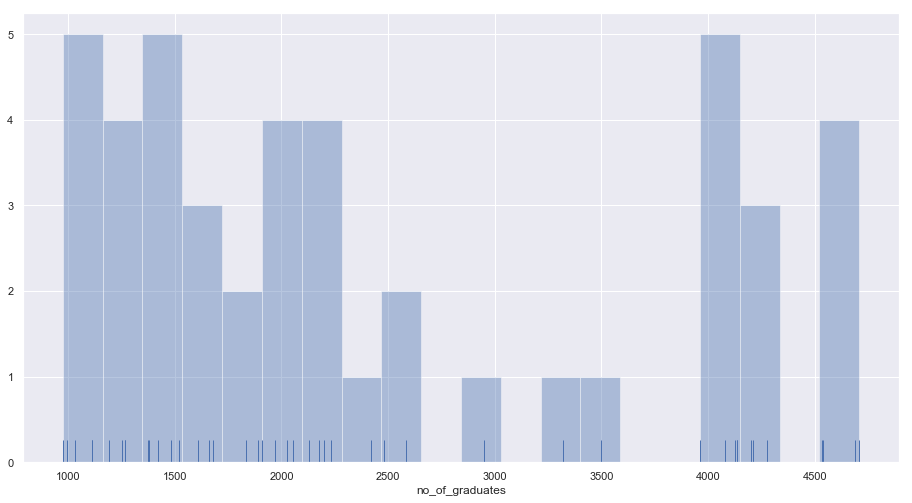

In [105]:
# sns.distplot(total, bins = 20, kde=False, rug=True);
# plt.show()

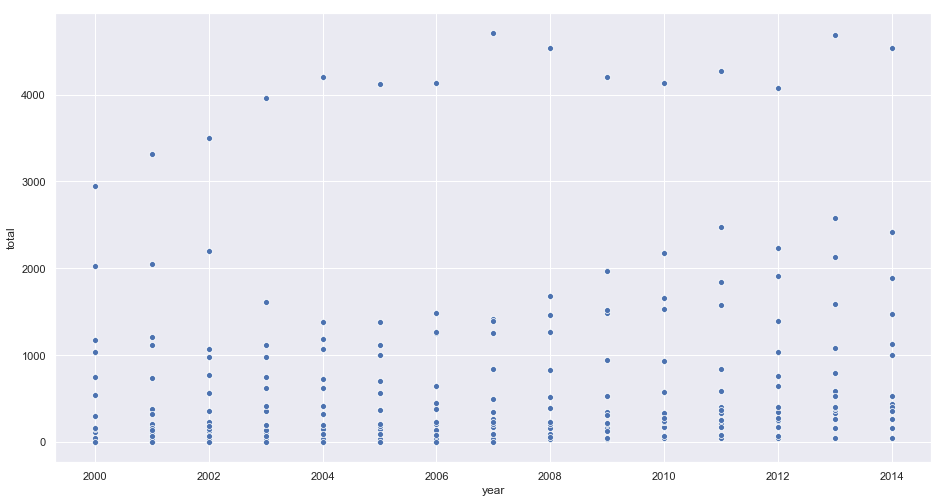

In [136]:
ax = sns.scatterplot(x="year", y="total", data=firstgrad, palette="Set3")